# Törmäysten visualisointi  


Maailman isoin hiukkaskiihdytin LHC (Large Hadron Collider) kiihdyttää CERN:issä protoneita joiden törmäyksistä CMS (Compact Muon Solenoid) kerää dataa. LHC törmäyttää protoni ryppäitä noin 40 miljoonaa kertaa sekunnissa [2], mutta vain osa tapahtumista johtaa suurienergisiin törmäyksiin. Osa törmäyksen energiasta muuttuu massaksi ($E=mc^2$) ja muodostuu uusia hiukkasia [4]. Raskaat ja lyhytikäiset hiukkaset hajoavat edelleen kevyempiin hiukkasiin, joita hiukkasilmaisin havaitsee. Tutkijoiden tehtäväksi jää selvittää mitä tapahtui törmäyksen ja mitatun datan välissä. Esimerkiksi Higgsin hiukkasta ilmaisin ei havaitse, mutta sen hajoamisesta syntyviä kevyempiä hiukkasia voidaan mitata. 


Tässä tehtävässä pääset tarkastelemaan aitoa dataa joka on kerätty CMS ilmaisimella. Käytetään visuaalista työkalulla joka löytyy CERN:in avoimen datan portaalista:
[http://opendata.cern.ch/visualise/events/CMS](http://opendata.cern.ch/visualise/events/CMS).

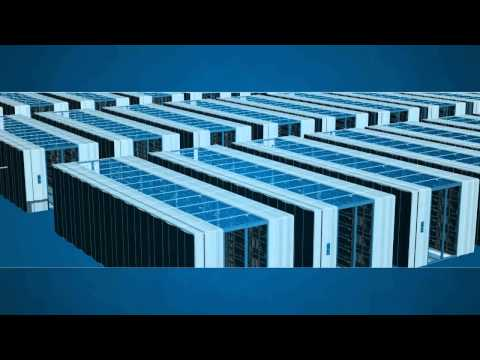

In [2]:
#Vielä nopea katsaus LHC hiukkaskiihdyttimeen ja CMS hiukkasilmaisimeen, videon (2.51min).

from IPython.lib.display import YouTubeVideo
YouTubeVideo('pQhbhpU9Wrg')
#www.youtube.com/embed/pQhbhpU9Wrg

****
## CMS ilmaisimen rakenteen tutkiskelu
CMS hiukkasilmaisin on rakenteeltaan kuin sipuli. Jokaisella kerroksella on tärkeä tehtävä törmäyksestä sinkoilevien hiukkasten ratojen määrittämisessä. Avataan visualisointi työkalu [CMS event display](http://opendata.cern.ch/visualise/events/CMS) ja ruvetaan tutkimaan CMS:n rakennetta lisäämällä kerroksia vasemman reunan "Detector" valikosta. Parhaan näkymän saa vaihtamalla "Ortographic projecton" asetukseen ja tarkastelemalla ilmaisinlieriötä pohjasta.

![title](../kuvat/EventDisplay_aloitus.PNG)

### Kerrosten tehtävät
Eri hiukkaset vaikuttavat aineen kanssa eri tavoin, eli tarvitaan erilaisia kerroksia mittamaan hiukkasten energioita ja ratoja. Tässä lyhyt tiivistelmä [kattavammasta esityksestä.](https://cms-docdb.cern.ch/cgi-bin/PublicDocDB/RetrieveFile?docid=12398&filename=SetOfPostersFN_HQ_small_16092014.pdf)
- **Jälki-ilmaisin**
Jälki-ilmaisin koostuu kahden tyyppisisitä pii osista. Jälki-ilmaisin havaitsee varattujen hiukkasten reitit, kun ne vuorovaikuttavat elekromagneettisesti ilmaisimen kanssa. Tarkan paikkadatan avulla voidaan määrittää protonien törmäyskohdat ja syntyneiden raskaampien ydinten hajoamispaikat. Myös hiukkasen radan kaarevuussäteen avulla voidaan laskea sen momentti.
    - _Pixel_ -ilmaisin on rakennettu pienistä piisoluista (65 miljoonaa kappaletta), jotka mittaavat varattujen hiukkasten radat hyvin tarkasti.
    - _Tracker_ -kerros on valmistettu piiliuskoista jotka niin ikään mittaavat hiukkasten ratoja.
- **Sähkömagneettinen kalorimetri (ECAL)**
Elektronien ja fotonien energiat saadaan mitattua hyvin tarkasti sillä niiden törmäyks ECAL-kerrokseen aiheuttaa sähkömagneettisen ryöpyn joka mitataan tuikeilmaisimilla. Törmänneen elektronin tai fotonin energia on suoraan verrannollinen tuikeilmaisimien havaitsemaan valon määrään.
- **Hadronikalorimetri (HCAL)**
Hadronikalorimetri pysäyttää hadroneiksi kutsutut hiukkaset kuten protonit ja netronit. HCAL-kerrokseen saapuvat hadronit menettävät liike-energiaansa hiukkasryöppyihin joiden synnyttämien tuikevalojen avulla saadaan lasketuksi hadronin alkuperäinen energia.
- **Myonijärjestelmä**
CMS ilmaisin on nimensä (Compact Muon Solenoid) mukaan suunniteltu erityisesti havaitsemaan myoneita. Myonit ovat vaikeasti havaittavia ja ne kulkevatkin ECAL ja HCAL kerrosten läpi pysähtymättä. Kuitenkin positiivisina hiukkasina niiden kulkiessa kaasulla täytettyjen kammioiden läpi (*drift tubes*) kaasu ionisoituu ja vapautuneet electronit sekä positiiviset ionit kulkeutuvat (*Cathode Strip Chambers*) anodeille ja katodeile. Signaalin avulla voidaan laskea myonin paikka tietyllä ajanhetkellä. *Resistive Plate Chambers* ovat myös osa myonijärjestelmää luoden signaalia, joka voidaan siirtää eteenpäin käsiteltäväksi.



Neutriinot havaitaan epäsuorasti liikemäärän säilymisen kautta.

![title](../kuvat/CMS_Slice.png)

(_Superconductin_ _Solenoid_ on todella tehokas solenoidimagneetti joka aiheuttaa CMS:n siäsosiin noin 100,000 kertaan maan magneettikenttää vahvemman magneettikentän. Vahva kenttä saa varattujen hiukkasten liikeradat kaartumaan ja mahdollistaa niiden luokittelun ja liikemäärän määrittämisen.)

Tarkat kuvaukset eri osien toiminnasta englanniksi: http://cms.web.cern.ch/news/detector-overview


****
## Törmäysten visualisointi
Event Displayn avulla voi tarkastella CMS-mittausaseman todellisia tuloksia. Tässä tehtävässä käytetään protonitörmäyksistä kerättyä dataa, joka sittemmin johti Higgsin hiukkasen löytämiseen vuonna 2012.

#### Aloitetaan törmäyksien tutkiminen

1. Avaa [CMS event display](http://opendata.cern.ch/visualise/events/CMS)
1. Paina vasemmasta yläkulmasta $\color{green}{\text{Open file}}$
1. Valitse $\color{green}{\text{Open file(s)}}$ 
1. Valitse  $\color{green}{\text{HiggsCandidates/}}$
1. Valitse toinen mahdollisista Higgsin bosonin hajoamistavoista
 > $\color{green}{\text{4lepton.ig}}$ nimisissä tiedostoissa syntyy neljä leptonia. Niissä saattaa esiintyä Higgsin hajoaminen kahdeksi Z bosoniksi, jotka edelleen hajoavat joko elektroni/positroni ($e^- e^+$) tai myoni/antimyoni ($\mu^- \mu^+$) pareiksi. Syntyy siis yhteensä neljä leptonia.
 
 <img src="../kuvat/higgs-4l.png" align="center" width="200px"> 
 > $\color{green}{\text{diphoton.ig}}$ tiedostoissa törmäyksessä syntyi 2 fotonia. Ne saattavat olla peräisin tapahtumasarjasta jossa Higgs hajoaa kahdeksi fotoniksi.
  
<img src="../kuvat/higgs-2photon.png" align="center" width="200px">
1. Valitse mikä tahansa ajo ja paina $\color{green}{\text{load}}$
1. Törmäyksen pitäisi nyt näkyä event displayssa. 
1. Poista vasemman reunan valikosta, $\color{orange}{\text{Tracking}}$ otsikon alta, valinta  $\color{orange}{\text{Tracks (reco.)}}$
 > Mikäli valitsit $\color{green}{\text{4lepton.ig}}$ valitse $\color{orange}{\text{Physics}}$ otsikon alta  $\color{orange}{\text{Electron Tracks (GSF)}}$ ja $\color{orange}{\text{Tracker Muons (Reco)}}$ näkyviksi. Huom: Valinta on näkyvissä vain jos kyseinen hiukkanen on läsnä tapahtumissa.
     - Löydätkö kaikki neljä leptonia? Montako elektronia ja montako myonia valitsemassasi ajossa syntyi? 
     - Voisivatko leptonit olla peräisin Higgsin hajoamisesta?
     - Tutki mihin ilmaisimen kerrokseen eri leptonien liike pysähtyy. (Matching muon chambers valinta paljastaa ne myonijärjestelmän kammiot joiden läpi myoni kulkee.) Vastaako tulos kerrosten kuvauksia?

 > Jos taas valitsit $\color{green}{\text{diphoton.ig}}$ tiedoston, valitse  $\color{orange}{\text{Physics}}$ otsikon alta  $\color{orange}{\text{Photons}}$ näkyviksi. Valinta on mahdollinen vain mikäli kyseisellä ajolla CMS todella havaitsi fotoneita.
    - Löydätkö kaksi fotonia? Voisivatko ne olla peräisin Higgsin hajoamisesta?
    - Tutki mihin ilmaisimen kerrokseen fotonien liike pysähtyy. Vastaako tulos kerrosten kuvauksia?
    
Kokeile eri datalla ja vertaa tuloksia.



****
Vuonna 2012 Atlaksen ja CMS:n tutkiat julkistivat löytäneensä Higsin bosonin. Teoreettisesti sen olemassaolo oli jo ennustettu, muttaa kokeellisesti se havaittiin ensimmäisen kerran LHC kiihdyttimen monen vuoden datan avulla. Higgsin bosoni täydentää standardimallia, muttei tee siitä ns. "kaiken teoriaa". CMS hiukkasilmaisimen tuottamaa dataa tutkitaan tauotta CERN:issä ja yliopistoissa ympäri maailmaa. Dataa tutkimalla tutkijat pyrkivät ymmärtämään paremmin aineen rakennetta ja esimerkiksi pimeän aineen ja antimateriaalin luonnetta. 

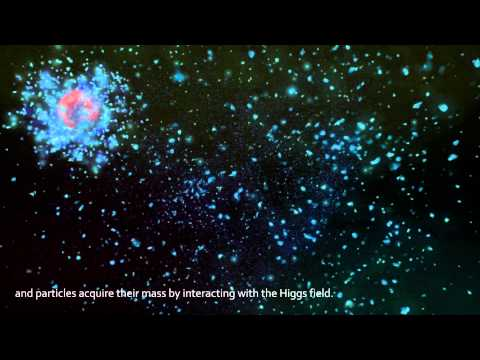

In [1]:

from IPython.lib.display import YouTubeVideo
YouTubeVideo('0QPTzogoJ-Q')
#https://youtu.be/0QPTzogoJ-Q

****
## Lähteet
[1] CMS koeasema, Diat suomeksi, Luettu 2019.
Url: [https://cms-docdb.cern.ch/cgi-bin/PublicDocDB/RetrieveFile?docid=12398&filename=SetOfPostersFN_HQ_small_16092014.pdf](https://cms-docdb.cern.ch/cgi-bin/PublicDocDB/RetrieveFile?docid=12398&filename=SetOfPostersFN_HQ_small_16092014.pdf).

[2] Detector overview. © Copyright CERN (2008-2014)
Url: [http://cms.web.cern.ch/news/detector-overview](http://cms.web.cern.ch/news/detector-overview)

[3] CMS Guide to education use of CMS Open Data
Url: [http://opendata.cern.ch/docs/cms-guide-for-education](http://opendata.cern.ch/docs/cms-guide-for-education)

[4] 12 steps - From idea to discovery, luettu 2019
Url: [https://home.cern/science/physics/12-steps-idea-discovery](https://home.cern/science/physics/12-steps-idea-discovery)
